# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
from scipy.stats import linregress
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Preview the cities that were generated above
cities

['bluff',
 'chokurdakh',
 'kapaa',
 'mogadishu',
 'punta arenas',
 'kita',
 'albany',
 'kodiak',
 'boguchany',
 'ushuaia',
 'lata',
 'upernavik',
 'mana',
 'jamestown',
 'cape town',
 'saint-philippe',
 'airai',
 'belushya guba',
 'sentyabrskiy',
 'ryotsu',
 'barrow',
 'thompson',
 'hilo',
 'avarua',
 'nikolskoye',
 'attawapiskat',
 'longyearbyen',
 'salta',
 'kikwit',
 'ozernovskiy',
 'rikitea',
 'vanavara',
 'provideniya',
 'umm lajj',
 'shimoda',
 'sisimiut',
 'atuona',
 'busselton',
 'madimba',
 'atambua',
 'alindao',
 'sibolga',
 'faanui',
 'lasa',
 'severo-kurilsk',
 'pevek',
 'butaritari',
 'warrnambool',
 'hay river',
 'yelizovo',
 'carnarvon',
 'mataura',
 'khatanga',
 'wana',
 'codrington',
 'dien bien',
 'mongo',
 'mar del plata',
 'leningradskiy',
 'dikson',
 'kahului',
 'torbay',
 'souillac',
 'san patricio',
 'taolanaro',
 'hermanus',
 'ekhabi',
 'srednekolymsk',
 'lichinga',
 'mao',
 'coquimbo',
 'wagar',
 'meulaboh',
 'santa maria',
 'cabo san lucas',
 'touros',
 'maheb

In [4]:
# Define variables for building a URL
url = "https://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"
api_key = weather_api_key

# Build partial query URL and test using a city from the generated list.
# city = "oshakati"
# query_url=f"{url}units={unit}&appid={api_key}&q={city}"
# test_response=requests.get(query_url)
# test_json=test_response.json()
# test_json

# Create empty lists to contain, lat/lon, temp (F), humidity, cloudiness, & wind speed (mph)
conf_city = []
lat = []
lon = []
temp = []
humidity = []
clouds = []
wind = []
country = []
date = []
index = 1 # Variable to use as the index reference within the for loop

# Create a for loop that goes through each city in the previously generated list and append data to the
# lists above
print('''Beginning Data Retrieval     
-----------------------------''')
for city in cities:
    query_url=f"{url}units={unit}&appid={api_key}&q={city}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    try:
        conf_city.append(weather_json["name"])
        lat.append(weather_json["coord"]["lat"])
        lon.append(weather_json["coord"]["lon"])
        temp.append(weather_json["main"]["temp_max"])
        humidity.append(weather_json["main"]["humidity"])
        clouds.append(weather_json["clouds"]["all"])
        wind.append(weather_json["wind"]["speed"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        print(f"Processing Record {index} of {len(cities)} | {city}")
    except:
        print("City not found. Skipping...")
        pass
    
    index = index + 1

print('''-----------------------------
Data Retrieval Complete      
-----------------------------''')

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of 603 | bluff
Processing Record 2 of 603 | chokurdakh
Processing Record 3 of 603 | kapaa
Processing Record 4 of 603 | mogadishu
Processing Record 5 of 603 | punta arenas
Processing Record 6 of 603 | kita
Processing Record 7 of 603 | albany
Processing Record 8 of 603 | kodiak
Processing Record 9 of 603 | boguchany
Processing Record 10 of 603 | ushuaia
Processing Record 11 of 603 | lata
Processing Record 12 of 603 | upernavik
Processing Record 13 of 603 | mana
Processing Record 14 of 603 | jamestown
Processing Record 15 of 603 | cape town
Processing Record 16 of 603 | saint-philippe
Processing Record 17 of 603 | airai
City not found. Skipping...
City not found. Skipping...
Processing Record 20 of 603 | ryotsu
Processing Record 21 of 603 | barrow
Processing Record 22 of 603 | thompson
Processing Record 23 of 603 | hilo
Processing Record 24 of 603 | avarua
Processing Record 25 of 603 | nikolskoye
City not foun

Processing Record 210 of 603 | qingquan
Processing Record 211 of 603 | malatya
Processing Record 212 of 603 | ruteng
Processing Record 213 of 603 | sao joao da barra
Processing Record 214 of 603 | havre-saint-pierre
Processing Record 215 of 603 | durusu
Processing Record 216 of 603 | bataysk
Processing Record 217 of 603 | barreirinhas
Processing Record 218 of 603 | catamarca
Processing Record 219 of 603 | opelousas
Processing Record 220 of 603 | okha
Processing Record 221 of 603 | chuy
Processing Record 222 of 603 | cherskiy
Processing Record 223 of 603 | kapoeta
Processing Record 224 of 603 | olafsvik
Processing Record 225 of 603 | preobrazheniye
Processing Record 226 of 603 | gamba
City not found. Skipping...
Processing Record 228 of 603 | dali
Processing Record 229 of 603 | worland
Processing Record 230 of 603 | maragheh
Processing Record 231 of 603 | suzaka
Processing Record 232 of 603 | karratha
Processing Record 233 of 603 | shubarshi
City not found. Skipping...
Processing Record

Processing Record 420 of 603 | micheweni
Processing Record 421 of 603 | dalbandin
Processing Record 422 of 603 | altadena
Processing Record 423 of 603 | mehamn
Processing Record 424 of 603 | finschhafen
Processing Record 425 of 603 | sorland
Processing Record 426 of 603 | yuanping
Processing Record 427 of 603 | osorno
City not found. Skipping...
Processing Record 429 of 603 | bandarbeyla
Processing Record 430 of 603 | san antonio
Processing Record 431 of 603 | pedernales
Processing Record 432 of 603 | esperance
Processing Record 433 of 603 | kwinana
City not found. Skipping...
Processing Record 435 of 603 | georgetown
Processing Record 436 of 603 | concepcion del uruguay
Processing Record 437 of 603 | saint-jean-port-joli
Processing Record 438 of 603 | howard springs
Processing Record 439 of 603 | idrinskoye
Processing Record 440 of 603 | hailar
Processing Record 441 of 603 | ati
Processing Record 442 of 603 | tateyama
Processing Record 443 of 603 | portobelo
Processing Record 444 of 6

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Combine all lists into a df.
d = {"City": conf_city, "Lat": lat, "Lon": lon, "Max Temp (F)": temp, "Humidity": humidity, "Cloudiness": clouds,\
    "Wind Speed (mph)": wind, "Country": country, "Date": date}
weather_df = pd.DataFrame(d)
weather_df.head()

,City,Lat,Lon,Max Temp (F),Humidity,Cloudiness,Wind Speed (mph),Country,Date
0,Bluff,-46.6000,168.3333,57.79,70,14,15.41,NZ,1659583256
1,Chokurdakh,70.6333,147.9167,48.20,61,100,14.74,RU,1659583257
2,Kapaa,22.0752,-159.3190,84.18,67,0,12.66,US,1659583257
3,Mogadishu,2.0371,45.3438,75.60,82,21,16.40,SO,1659583226
4,Punta Arenas,-53.1500,-70.9167,37.51,93,75,16.11,CL,1659583037


In [6]:
# Export the city data into a .csv
os.makedirs("output_data", exist_ok=True)  
weather_df.to_csv("output_data/weather_df.csv")

In [7]:
# Review and notice there are no cities included in dataset that have a humidity > 100%
weather_df.describe()

,Lat,Lon,Max Temp (F),Humidity,Cloudiness,Wind Speed (mph),Date
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,5.570000e+02
mean,19.755496,19.140238,69.767864,73.430880,54.073609,7.880108,1.659583e+09
std,33.336120,92.107545,12.674839,17.914193,39.774137,5.737153,8.873449e+01
min,-54.800000,-175.200000,34.970000,1.000000,0.000000,0.000000,1.659583e+09
25%,-6.836700,-60.145800,60.710000,64.000000,11.000000,3.650000,1.659583e+09
50%,24.687700,25.255300,70.450000,77.000000,60.000000,6.580000,1.659583e+09
75%,49.086900,100.354300,78.940000,87.000000,99.000000,11.180000,1.659583e+09
max,78.218600,179.316700,100.270000,100.000000,100.000000,32.820000,1.659583e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

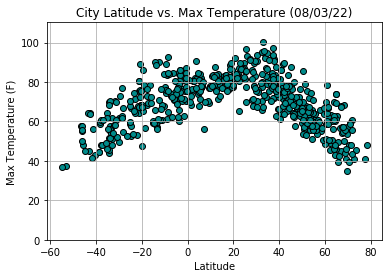

In [36]:
x_axis = weather_df["Lat"]
y_axis_temp = weather_df["Max Temp (F)"]
plt.scatter(x_axis, y_axis_temp, marker="o", facecolors="darkcyan", edgecolors="black")
plt.title("City Latitude vs. Max Temperature (08/03/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.ylim(0, max(y_axis_temp)+10)
plt.grid(True)
plt.savefig("output_data/max_temp.png", dpi=300)
plt.show()

### The code is visualizing the relationship between the max temperature for each city and the city's latitude. The closer to the equator, in general, the warmer it is.

## Latitude vs. Humidity Plot

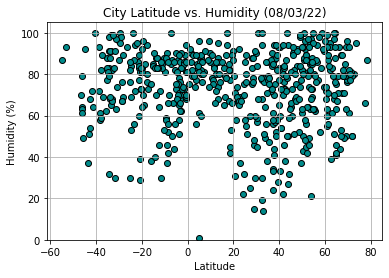

In [38]:
y_axis_humid = weather_df["Humidity"]
plt.scatter(x_axis, y_axis_humid, marker="o", facecolors="darkcyan", edgecolors="black")
plt.title("City Latitude vs. Humidity (08/03/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0, max(y_axis_humid)+5)
plt.grid(True)
plt.savefig("output_data/humidity.png", dpi=300)
plt.show()

### The code is visualizing the relationship between the humidity for each city and the city's latitude. The cities closer to the equator on the northern hemisphere appear to have less of a spread than cities more north or more south.

## Latitude vs. Cloudiness Plot

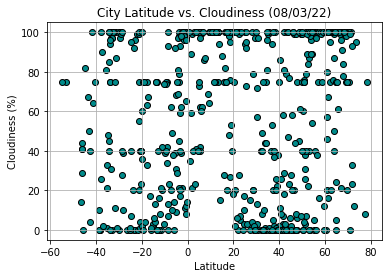

In [39]:
y_axis_cloud = weather_df["Cloudiness"]
plt.scatter(x_axis, y_axis_cloud, marker="o", facecolors="darkcyan", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (08/03/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5, max(y_axis_cloud)+5)
plt.grid(True)
plt.savefig("output_data/cloudiness.png", dpi=300)
plt.show()

### The code is visualizing the relationship between the cloudiness for each city and the city's latitude.

## Latitude vs. Wind Speed Plot

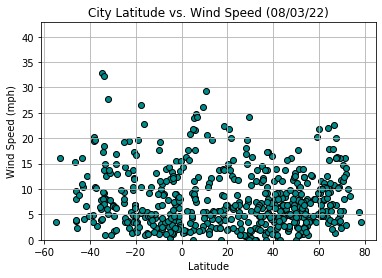

In [40]:
y_axis_wind = weather_df["Wind Speed (mph)"]
plt.scatter(x_axis, y_axis_wind, marker="o", facecolors="darkcyan", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (08/03/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0, max(y_axis_wind)+10)
plt.grid(True)
plt.savefig("output_data/wind.png", dpi=300)
plt.show()

### The code is visualizing the relationship between the wind speed for each city and the city's latitude.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [42]:
x_axis_n = weather_df.loc[weather_df["Lat"]>=0, "Lat"]
y_axis = weather_df.loc[weather_df["Lat"]>=0,"Max Temp (F)"]

The r-value is: 0.6992174494036063


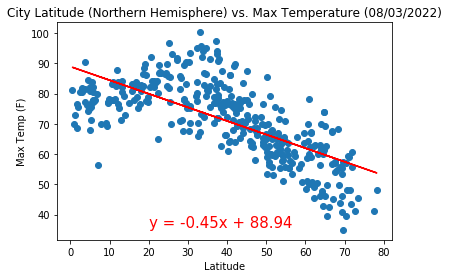

In [43]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_n, y_axis)
regress_values = x_axis_n * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_n,y_axis)
plt.plot(x_axis_n,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("City Latitude (Northern Hemisphere) vs. Max Temperature (08/03/2022)")
print(f"The r-value is: {abs(rvalue)}")
plt.savefig("output_data/n_max_temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [44]:
x_axis_s = weather_df.loc[weather_df["Lat"]<0, "Lat"]
y_axis = weather_df.loc[weather_df["Lat"]<0,"Max Temp (F)"]

The r-value is: 0.7241071601974143


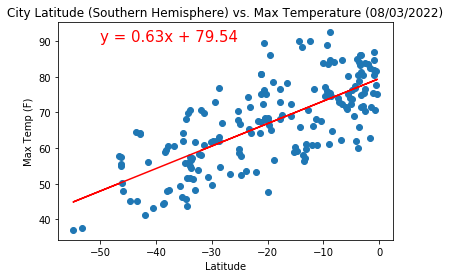

In [46]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_s, y_axis)
regress_values = x_axis_s * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_s,y_axis)
plt.plot(x_axis_s,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("City Latitude (Southern Hemisphere) vs. Max Temperature (08/03/2022)")
print(f"The r-value is: {abs(rvalue)}")
plt.savefig("output_data/s_max_temp.png")
plt.show()

### The linear regression is modeling a strong correlation between max temp and proximity to the equator. In both figures, it shows temperatures tend to rise the closer the city is to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [16]:
weather_df.head()

,City,Lat,Lon,Max Temp (F),Humidity,Cloudiness,Wind Speed (mph),Country,Date
0,Bluff,-46.6000,168.3333,57.79,70,14,15.41,NZ,1659583256
1,Chokurdakh,70.6333,147.9167,48.20,61,100,14.74,RU,1659583257
2,Kapaa,22.0752,-159.3190,84.18,67,0,12.66,US,1659583257
3,Mogadishu,2.0371,45.3438,75.60,82,21,16.40,SO,1659583226
4,Punta Arenas,-53.1500,-70.9167,37.51,93,75,16.11,CL,1659583037


In [48]:
x_axis_n = weather_df.loc[weather_df["Lat"]>=0, "Lat"]
y_axis = weather_df.loc[weather_df["Lat"]>=0,"Humidity"]

The r-value is: 0.014941769125940356


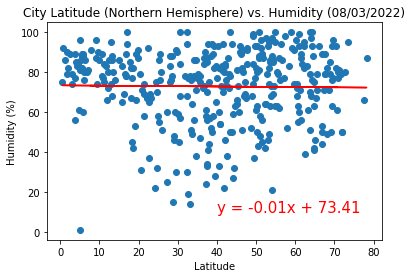

In [49]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_n, y_axis)
regress_values = x_axis_n * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_n,y_axis)
plt.plot(x_axis_n,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude (Northern Hemisphere) vs. Humidity (08/03/2022)")
print(f"The r-value is: {abs(rvalue)}")
plt.savefig("output_data/n_humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [51]:
x_axis_s = weather_df.loc[weather_df["Lat"]<0, "Lat"]
y_axis = weather_df.loc[weather_df["Lat"]<0,"Humidity"]

The r-value is: 0.02824094335761963


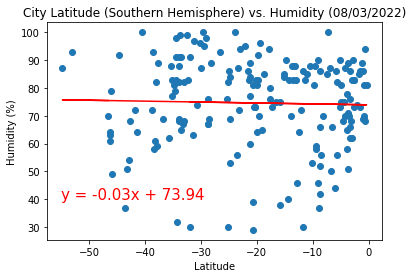

In [52]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_s, y_axis)
regress_values = x_axis_s * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_s,y_axis)
plt.plot(x_axis_s,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude (Southern Hemisphere) vs. Humidity (08/03/2022)")
print(f"The r-value is: {abs(rvalue)}")
plt.savefig("output_data/s_humidity.png")
plt.show()

### The linear regressions are showing that there is no correlation between the city's latitude and humidity in the data provided.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [53]:
x_axis_n = weather_df.loc[weather_df["Lat"]>=0, "Lat"]
y_axis = weather_df.loc[weather_df["Lat"]>=0,"Cloudiness"]

The r-value is: 0.00022237930140800072


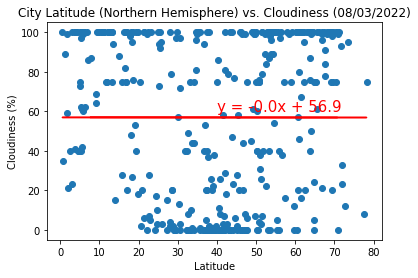

In [54]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_n, y_axis)
regress_values = x_axis_n * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_n,y_axis)
plt.plot(x_axis_n,regress_values,"r-")
plt.annotate(line_eq,(40,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude (Northern Hemisphere) vs. Cloudiness (08/03/2022)")
print(f"The r-value is: {abs(rvalue)}")
plt.savefig("output_data/n_cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [55]:
x_axis_s = weather_df.loc[weather_df["Lat"]<0, "Lat"]
y_axis = weather_df.loc[weather_df["Lat"]<0,"Cloudiness"]

The r-value is: 0.02025372229131794


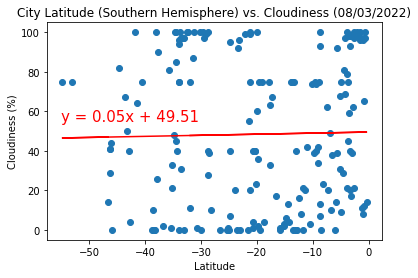

In [56]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_s, y_axis)
regress_values = x_axis_s * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_s,y_axis)
plt.plot(x_axis_s,regress_values,"r-")
plt.annotate(line_eq,(-55,55),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude (Southern Hemisphere) vs. Cloudiness (08/03/2022)")
print(f"The r-value is: {abs(rvalue)}")
plt.savefig("output_data/s_cloudiness.png")
plt.show()

### The linear regressions are showing that there is no correlation between the city's latitude and cloudiness in the data provided.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [58]:
x_axis_n = weather_df.loc[weather_df["Lat"]>=0, "Lat"]
y_axis = weather_df.loc[weather_df["Lat"]>=0,"Wind Speed (mph)"]

The r-value is: 0.02905314699599705


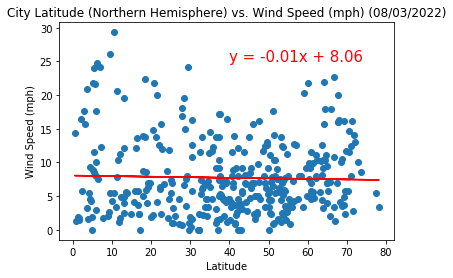

In [59]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_n, y_axis)
regress_values = x_axis_n * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_n,y_axis)
plt.plot(x_axis_n,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude (Northern Hemisphere) vs. Wind Speed (mph) (08/03/2022)")
print(f"The r-value is: {abs(rvalue)}")
plt.savefig("output_data/n_wind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [60]:
x_axis_s = weather_df.loc[weather_df["Lat"]<0, "Lat"]
y_axis = weather_df.loc[weather_df["Lat"]<0,"Wind Speed (mph)"]

The r-value is: 0.21340018807538896


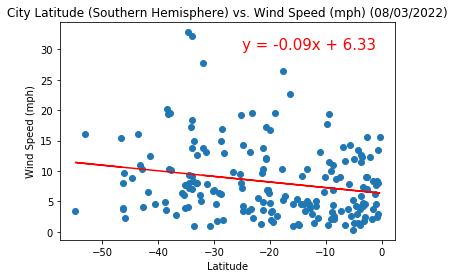

In [61]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_s, y_axis)
regress_values = x_axis_s * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_s,y_axis)
plt.plot(x_axis_s,regress_values,"r-")
plt.annotate(line_eq,(-25,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude (Southern Hemisphere) vs. Wind Speed (mph) (08/03/2022)")
print(f"The r-value is: {abs(rvalue)}")
plt.savefig("output_data/s_wind.png")
plt.show()

### The linear regressions are showing that there is no correlation between the city's latitude and wind speed in the data provided.